### DLTK ML Regression Tutorial

In [ ]:
# If you are running this notebook on GOOGLE COLAB, uncomment below code & run this cell

# !git clone https://github.com/dltk-ai/qubitai-dltk.git
# %cd qubitai-dltk/examples/machine_learning/
# !pip install qubitai-dltk

In [1]:
# if using source code

import os
os.chdir("../../")

#### <font color=black> Importing Packages

In [2]:
import json

import dltk_ai
from dltk_ai import data_preprocessing
from dltk_ai import helper
from dltk_ai.dataset_types import Dataset
from getpass import getpass

#### Data

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

The description of these variables:

**CRIM**: Per capita crime rate by town

**ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

**INDUS**: Proportion of non-retail business acres per town

**CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX**: Nitric oxide concentration (parts per 10 million)

**RM**: Average number of rooms per dwelling

**AGE**: Proportion of owner-occupied units built prior to 1940

**DIS**: Weighted distances to five Boston employment centers

**RAD**: Index of accessibility to radial highways

**TAX**: Full-value property tax rate per $10,000

**PTRATIO**: Pupil-teacher ratio by town

**B**: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

**LSTAT**: Percentage of lower status of the population

**MEDV** - Median value of owner-occupied homes in $1000's    
    

In [3]:
# Read data into a dataframe
dataset = data_preprocessing.read_data('examples/data/csv/boston_train.csv')
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.15172,0.0,8.14,0,0.538,5.701,95.0,3.7872,4,307,21.0,358.77,18.35,13.1
1,0.01501,90.0,1.21,1,0.401,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50.0
2,73.53410,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
3,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
4,9.59571,0.0,18.10,0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31,12.1


In [4]:
#Shape of the data
dataset.shape


(404, 14)

#### Data Profile


In [5]:
data_preprocessing.data_profile(dataset)

In the above output, please click on the **play button**.

In the **describe** section, you will be able to see the characteristics of all the variables.

* Variable ZS has 0 value for 25th & 50th Quantile
* Variable CHAS has 0 value for 25th, 50th & 75th Percentile. 
* These columns may not be useful in predicting MEDV

**Distribution of Target Variable**

* We see that the values of MEDV (target variable) has few outliers.

**Distribution of other variables**

* Most of the predictors contain outliers.
    
**Correlation**

In the **correlations** section, from the matrix,

    * We see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors.

#### Data Preprocessing

<AxesSubplot:>

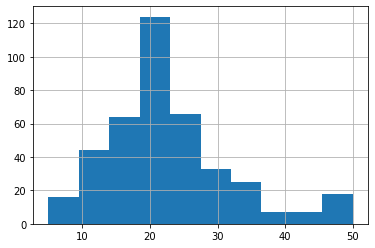

In [6]:
# Distribution of target variable
dataset["MEDV"].hist()

#### Outlier Treatment

<AxesSubplot:>

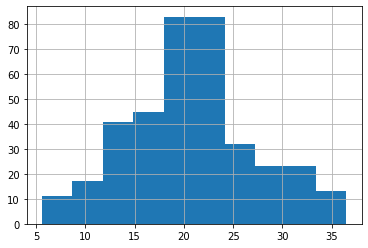

In [7]:
# Treat outliers from the target varible
# remove data where 'MEDV' has outliers
data = data_preprocessing.treat_outliers(dataset,['MEDV'],method="remove",value=True)

# Distribution of Target Variable after removing Outliers
data['MEDV'].hist()

#### Feature Scaling

##### **Importance of Scaling**

<font color=black> If there is a vast difference in the range of the input data, machine learning algorithms underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.

In [8]:
## MinMax scaler from dltk
scaler_columns = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

scaled_data = data_preprocessing.feature_scaling(data, scaler_columns, method="minmaxscaler")

scaled_data['MEDV'] = data['MEDV']
scaled_data.to_csv('boston_train_processed.csv',index=False)

In [9]:
# Preprocessing Prediction Data
pred_dataset = data_preprocessing.read_data('examples/data/csv/boston_test.csv')

pred_scaler_columns = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

pred_scaled_data = data_preprocessing.feature_scaling(pred_dataset, pred_scaler_columns, method="minmaxscaler")


# save preprocessed prediction dataset
pred_scaled_data.to_csv('boston_prediction_processed.csv',index=False)

#### Initializing DLTK Client

Please check qubitai-dltk documentation on setting up dltk **link**

> <u>Parameters Descriptions</u>
>
> **API key**: `If authentication is enabled`, you need to provide a valid API key
>
> **base_url**: url where kong/base service provided by OpenDLTK is deployed.

In [11]:
api_key = getpass("Valid API key (default=None) : ") or None
base_url = input("Endpoint for openDLTK (default=http://localhost:5000) : ") or "http://localhost:5000"

client = dltk_ai.DltkAiClient(api_key, base_url)

Valid API key (default=None) : ········
Endpoint for openDLTK (default=http://localhost:5000) : https://preprod-gcp-kong.dltk.ai


<div class="alert alert-block alert-info">
<b>See Also:</b> 

 

1. [How to generate API key](https://docs.dltk.ai/qubitai-dltk/docs/build/html/getting_started/generateAPIkey.html)
2. [OpenDLTK deployment](http://docs.dltk.ai/qubitai-dltk/docs/build/html/getting_started/openDLTK_setup.html)

 

</div>

#### Uploading training data

In [12]:
# Upload Train dataset
train_data_store_response = client.store('boston_train_processed.csv', Dataset.TRAIN_DATA)
print(train_data_store_response)
train_data = train_data_store_response['fileUrl']

C:\Users\kavya\AppData\Roaming\Python\Python38\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'preprod-gcp-kong.dltk.ai'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings



{'id': 536610601703051, 'userId': 687361782950394294, 'username': None, 'fileUrl': '/YOUR_S3_BUCKET/private/687361782950394294/Train_Data/1627031054174_boston_train_processed.csv', 's3Url': None, 'fileSize': 67263, 'fileName': 'boston_train_processed.csv', 'label': 'Train_Data', 'type': 'FILE', 'isPublic': False, 'cloudfrontUrl': None, 'cloudfrontUrlSigned': None, 's3Key': 'private/687361782950394294/Train_Data/1627031054174_boston_train_processed.csv', 'metadata': {'attributes': ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']}, 'fileSystem': 'GCP', 'projectId': 0, 'isDefault': False, 'createdAt': '2021-07-23T09:04:14.594+00:00', 'updatedAt': '2021-07-23T09:04:14.594+00:00'}


#### Uploading prediction data

In [13]:
# Upload Train dataset
prediction_data_store_response = client.store('boston_prediction_processed.csv', Dataset.TEST_DATA)
print(prediction_data_store_response)
prediction_data = prediction_data_store_response['fileUrl']

C:\Users\kavya\AppData\Roaming\Python\Python38\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'preprod-gcp-kong.dltk.ai'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings



{'id': 538643912436237, 'userId': 687361782950394294, 'username': None, 'fileUrl': '/YOUR_S3_BUCKET/private/687361782950394294/Test_Data/1627031055237_boston_prediction_processed.csv', 's3Url': None, 'fileSize': 17636, 'fileName': 'boston_prediction_processed.csv', 'label': 'Test_Data', 'type': 'FILE', 'isPublic': False, 'cloudfrontUrl': None, 'cloudfrontUrlSigned': None, 's3Key': 'private/687361782950394294/Test_Data/1627031055237_boston_prediction_processed.csv', 'metadata': {'attributes': ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']}, 'fileSystem': 'GCP', 'projectId': 0, 'isDefault': False, 'createdAt': '2021-07-23T09:04:15.528+00:00', 'updatedAt': '2021-07-23T09:04:15.528+00:00'}


#### Model Building

Next step after uploading the dataset is to train a model using Train Dataset.
Please check [qubitai-dltk document](https://docs.dltk.ai) for supported Libraries/framework for training a model.

We will be building 2 models using RandomForest from scikit and LinearRegression from weka to check which is the best performing algorithm for this problem.

**Model 1**

*  **Library :** scikit
*  **Algorithm :** RandomForest

**Model 2** - Hyperparameter Tuning

*  **Library :** scikit
*  **Algorithm :** RandomForest

**Model 3**

*  **Library :** h2o
*  **Algorithm :** LinearRegression


#### Model 1


In [14]:
# Define the task - Classification/Regression
task = "regression"

# Library to use (scikit, weka, h2o)
library_1 = "scikit"
algorithm_1 = "RandomForest"

# features to be used for training
features = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

# Label to predict
label = 'MEDV'

# Train-test split percentage
train_percentage_1 = 60

#### Information about supported libraries & Hyperparameters

1. To check list of supported libraries, we can use below code

In [15]:
dltk_ai.helper.get_ml_model_info("libraries")

Supported libraries for Machine Learning: ['scikit', 'weka', 'h2o']


2. To check list of supported algorithms under a supported library for classification task, For more details on supported algorithm check reference link

In [16]:
dltk_ai.helper.get_ml_model_info("algorithms", library='scikit', task='regression')

Supported algorithms for REGRESSION task in SCIKIT library are:

 algorithm : DecisionTrees,
 reference link: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

 algorithm : RandomForest,
 reference link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

 algorithm : Bagging,
 reference link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

 algorithm : GradientBoostingMachines,
 reference link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

 algorithm : XGradientBoosting,
 reference link: https://xgboost.readthedocs.io/en/latest/python/python_api.html#

 algorithm : ExtraTrees,
 reference link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html

 algorithm : AdaBoost,
 reference link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.h

In [17]:
dltk_ai.helper.get_ml_model_info("hyperparameters", library='scikit', task='regression', algorithm='RandomForest')

Supported hyperparameters for RANDOMFOREST algorithm in SCIKIT library are: 
 
Parameter                                              Default Value                 
bootstrap                                              True                          
ccp_alpha                                              0.0                           
criterion                                              mse                           
max_depth                                              None                          
max_features                                           auto                          
max_leaf_nodes                                         None                          
max_samples                                            None                          
min_impurity_decrease                                  0.0                           
min_impurity_split                                     None                          
min_samples_leaf                                       1     

4. Set parameters for building the model

In [18]:
randomforest_parameters = {"bootstrap":True, "n_estimators":300, "oob_score":True, "min_samples_leaf":3}

##### send request for model training

###  Model 1

In [19]:
train_response_m1 = client.train(task, algorithm_1, train_data, label,features,"House Price Prediction Model M1", library_1, train_percentage_1, params=randomforest_parameters)
print(train_response_m1)

{'code': 0, 'data': {'jobId': 174473, 'appId': 1608720742960, 'projectId': 0, 'name': 'scikit_regression_train', 'library': 'scikit', 'service': 'Regression', 'task': 'TRAIN', 'state': 'RUN', 'startTime': '2021-07-23T09:04:25.471+00:00', 'endTime': None, 'request': {'library': 'scikit', 'jobType': 'CSV', 'queryId': None, 'modelId': None, 'isSingle': False, 'singleRow': None, 'config': {'name': 'House Price Prediction Model M1', 'algorithm': 'RandomForest', 'datasetUrl': '/YOUR_S3_BUCKET/private/687361782950394294/Train_Data/1627031054174_boston_train_processed.csv', 'label': 'MEDV', 'trainPercentage': 60, 'features': ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'], 'params': {'bootstrap': True, 'n_estimators': 300, 'oob_score': True, 'min_samples_leaf': 3}, 'folds': 5, 'crossValidation': False, 'evalPlots': False}}, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isSingle': False, 'isJobStopped': None, 'automateJobId': None, 'output': None}}


###  Model 2
    
Building model with default parameters and cross validation

In [20]:
# Train-test split percentage
train_percentage_2 = 80

# cross validation
folds = 10
cross_validation = True

train_response_m2 = client.train(task, algorithm_1, train_data, label,features,"House Price Prediction Model M1", library_1, train_percentage_2, folds, cross_validation)
print(train_response_m2)

{'code': 0, 'data': {'jobId': 174474, 'appId': 1608720742960, 'projectId': 0, 'name': 'scikit_regression_train', 'library': 'scikit', 'service': 'Regression', 'task': 'TRAIN', 'state': 'RUN', 'startTime': '2021-07-23T09:04:26.442+00:00', 'endTime': None, 'request': {'library': 'scikit', 'jobType': 'CSV', 'queryId': None, 'modelId': None, 'isSingle': False, 'singleRow': None, 'config': {'name': 'House Price Prediction Model M1', 'algorithm': 'RandomForest', 'datasetUrl': '/YOUR_S3_BUCKET/private/687361782950394294/Train_Data/1627031054174_boston_train_processed.csv', 'label': 'MEDV', 'trainPercentage': 80, 'features': ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'], 'params': {}, 'folds': 10, 'crossValidation': True, 'evalPlots': False}}, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isSingle': False, 'isJobStopped': None, 'automateJobId': None, 'output': None}}


### Model 3

In [21]:
algorithm_3 = "LinearRegression"
library_3 = "h2o"

#
train_percentage_3 = 70

# cross validation
folds = 5
cross_validation = True

train_response_m3 = client.train(task, algorithm_3, train_data, label,features,"House Price Prediction Model M2", library_3, train_percentage_3, folds=folds, cross_validation=cross_validation)
print(train_response_m3)

{'code': 0, 'data': {'jobId': 174475, 'appId': 1608720742960, 'projectId': 0, 'name': 'h2o_regression_train', 'library': 'h2o', 'service': 'Regression', 'task': 'TRAIN', 'state': 'RUN', 'startTime': '2021-07-23T09:04:27.153+00:00', 'endTime': None, 'request': {'library': 'h2o', 'jobType': 'CSV', 'queryId': None, 'modelId': None, 'isSingle': False, 'singleRow': None, 'config': {'name': 'House Price Prediction Model M2', 'algorithm': 'LinearRegression', 'datasetUrl': '/YOUR_S3_BUCKET/private/687361782950394294/Train_Data/1627031054174_boston_train_processed.csv', 'label': 'MEDV', 'trainPercentage': 70, 'features': ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'], 'params': {}, 'folds': 5, 'crossValidation': True, 'evalPlots': False}}, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isSingle': False, 'isJobStopped': None, 'automateJobId': None, 'output': None}}


#### Checking training status</font>

As training a model might take lot of time depending on size of dataset, we can check current status of model training using below functions

In [22]:
import json
train_job_status_response_m1 = client.job_status(train_response_m1['data']['jobId'])
print(train_job_status_response_m1)
print(json.dumps(train_job_status_response_m1, indent=2))

{'jobId': 174473, 'appId': 1608720742960, 'projectId': 0, 'name': 'scikit_regression_train', 'library': 'scikit', 'service': 'Regression', 'task': 'TRAIN', 'state': 'FINISH', 'startTime': '2021-07-23T09:04:25.471+00:00', 'endTime': None, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isSingle': False, 'isJobStopped': None, 'automateJobId': None, 'output': None}
{
  "jobId": 174473,
  "appId": 1608720742960,
  "projectId": 0,
  "name": "scikit_regression_train",
  "library": "scikit",
  "service": "Regression",
  "task": "TRAIN",
  "state": "FINISH",
  "startTime": "2021-07-23T09:04:25.471+00:00",
  "endTime": null,
  "isStreamJob": false,
  "jobType": "CSV",
  "queryId": null,
  "isSingle": false,
  "isJobStopped": null,
  "automateJobId": null,
  "output": null
}


In [23]:
train_job_status_response_m2 = client.job_status(train_response_m2['data']['jobId'])
print(train_job_status_response_m2)
print(json.dumps(train_job_status_response_m2, indent=2))

{'jobId': 174474, 'appId': 1608720742960, 'projectId': 0, 'name': 'scikit_regression_train', 'library': 'scikit', 'service': 'Regression', 'task': 'TRAIN', 'state': 'FINISH', 'startTime': '2021-07-23T09:04:26.442+00:00', 'endTime': None, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isSingle': False, 'isJobStopped': None, 'automateJobId': None, 'output': None}
{
  "jobId": 174474,
  "appId": 1608720742960,
  "projectId": 0,
  "name": "scikit_regression_train",
  "library": "scikit",
  "service": "Regression",
  "task": "TRAIN",
  "state": "FINISH",
  "startTime": "2021-07-23T09:04:26.442+00:00",
  "endTime": null,
  "isStreamJob": false,
  "jobType": "CSV",
  "queryId": null,
  "isSingle": false,
  "isJobStopped": null,
  "automateJobId": null,
  "output": null
}


In [24]:
train_job_status_response_m3 = client.job_status(train_response_m3['data']['jobId'])
print(train_job_status_response_m3)
print(json.dumps(train_job_status_response_m3, indent=2))

{'jobId': 174475, 'appId': 1608720742960, 'projectId': 0, 'name': 'h2o_regression_train', 'library': 'h2o', 'service': 'Regression', 'task': 'TRAIN', 'state': 'FINISH', 'startTime': '2021-07-23T09:04:27.153+00:00', 'endTime': None, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isSingle': False, 'isJobStopped': None, 'automateJobId': None, 'output': None}
{
  "jobId": 174475,
  "appId": 1608720742960,
  "projectId": 0,
  "name": "h2o_regression_train",
  "library": "h2o",
  "service": "Regression",
  "task": "TRAIN",
  "state": "FINISH",
  "startTime": "2021-07-23T09:04:27.153+00:00",
  "endTime": null,
  "isStreamJob": false,
  "jobType": "CSV",
  "queryId": null,
  "isSingle": false,
  "isJobStopped": null,
  "automateJobId": null,
  "output": null
}


<font color=red>**Note :**</font> Proceed further only after state is **'FINISH'**
    
####  Model Training Job Output </font>

##### **Model Evaluation in DLTK**

<font color=black> During the training process, based on the train percentage input, the data is divided into train and test sets. Train set is used for model building and test set is used to evaluate the model. The metrics displayed in the Job Output function consists metrics of both train and test sets.

Once model training job is finished, we can look into the model evaluation metrics such as 
- errorRate
- R2

& also get **modelUrl**, which will be required for prediction step

In [25]:
# Model 1 Evaluation Metrics
train_job_output_response_m1 = client.job_output(train_response_m1['data']['jobId'])
train_job_output_response_m1

{'id': 145072,
 'jobId': 174473,
 'output': {'eval': {'R2': 0.7972167440035189,
   'MAE': 2.134227607099585,
   'MSE': 8.14029369166027,
   'errorRate': 2.8531199925100013,
   'residuals': [2.6004778684278733,
    -0.5442833092832942,
    -0.7984602240351997,
    0.23155721685719755,
    -0.6674353267103186,
    -1.031985236985216,
    1.8580669071669185,
    1.2673871535871548,
    -2.2655887926887797,
    4.097007989232985,
    -0.5239260582010488,
    -4.0251133357383075,
    -0.5989470177970269,
    1.3073468207718228,
    3.322993931068922,
    2.89779327801827,
    -3.668103379028393,
    -3.133488684463689,
    -3.5741393171643026,
    -0.6781902356902343,
    3.219906589706582,
    0.05958810171311768,
    2.0978064028564205,
    -0.4810165464165479,
    -1.4217464831464817,
    -0.09062694805195548,
    -0.16987970732970936,
    -4.354765254190248,
    -1.461510551485535,
    4.5025404327154135,
    3.547339045214059,
    -2.0668915121915106,
    -1.2403972582972589,
    2.067

In [26]:
# Model 2 Evaluation Metrics
train_job_output_response_m2 = client.job_output(train_response_m2['data']['jobId'])
train_job_output_response_m2

{'id': 145074,
 'jobId': 174474,
 'output': {'eval': {'r2': {'std': 0.048324029652919834,
    'average': 0.8106385758354924},
   'explained_variance': {'std': 0.047461551580336006,
    'average': 0.8171325946833363},
   'mean_squared_error': {'std': 1.7504010710072582,
    'average': 7.427897954978664},
   'mean_absolute_error': {'std': 0.22369484425159267,
    'average': 1.997614438122333},
   'mean_squared_log_error': {'std': 0.006321581275756849,
    'average': 0.019382576540085943}},
  'modelUrl': '/YOUR_S3_BUCKET/private/687361782950394294/model/1627031071044_modelfile',
  'evalTrain': {'r2': {'std': 0.0016228488257791112,
    'average': 0.9757396291305392},
   'explained_variance': {'std': 0.0016167834833102585,
    'average': 0.9757477930856965},
   'mean_squared_error': {'std': 0.05320523776856021,
    'average': 1.0120551060042096},
   'pearsonCorrelation': {'RM': 0.5249690132766803,
    'AGE': -0.5493631791851413,
    'DIS': 0.43478427160447214,
    'NOX': -0.5671191430758109

In [27]:
# Model 3 Evaluation Metrics
train_job_output_response_m3 = client.job_output(train_response_m3['data']['jobId'])
train_job_output_response_m3

{'id': 145073,
 'jobId': 174475,
 'output': {'eval': None,
  'modelUrl': '/YOUR_S3_BUCKET/private/687361782950394294/model/1627031068532_GLM_model_python_1627030444190_4',
  'evalTrain': {'r2': {'std': '0.039049223', 'average': '0.70681757'},
   'mae': {'std': '0.31110284', 'average': '2.6736317'},
   'mse': {'std': '3.2942836', 'average': '12.039716'},
   'rmse': {'std': '0.44845363', 'average': '3.4465675'},
   'rmsle': {'std': '0.037884597', 'average': '0.18894435'},
   'null_deviance': {'std': '730.2986', 'average': '3134.0696'},
   'residual_deviance': {'std': '320.04456', 'average': '906.3374'},
   'pearsonCorrelation': {'RM': 0.5249690132766803,
    'AGE': -0.5493631791851413,
    'DIS': 0.43478427160447214,
    'NOX': -0.5671191430758109,
    'TAX': -0.5840169438374804,
    'INDUS': -0.6077690555969028,
    'LSTAT': -0.781078183518635,
    'PTRATIO': -0.5081654222854678},
   'mean_residual_deviance': {'std': '3.2942836', 'average': '12.039716'}}}}

##### Evaluation Metric Plots


Plot the Output from model metrics

In [28]:
import dltk_ai
from dltk_ai import visualization

##### Model 1

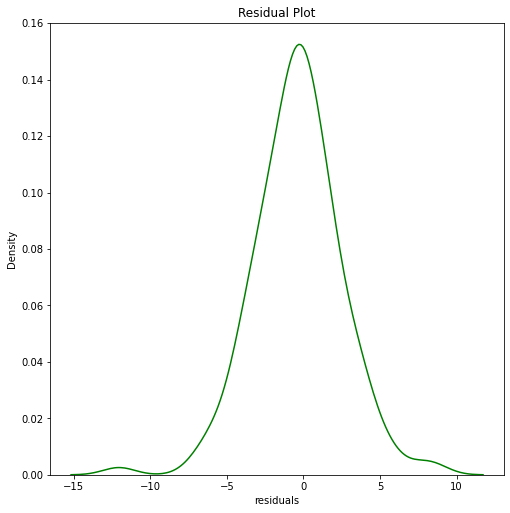

In [29]:
visualization.model_evaluation_plots(task="regression", data=train_job_output_response_m1, plots="residual_plot")

We have used the same algorithm for model 1 and model 2. The difference is in the hyperparameters. We can see the R2 of model 1 is 0.80 and average R2 of model 2 after cross validation is 0.82. which means model 2 is able to explain the variance better than model 1 and also model 3 (R2 avg = 0.71).

We will be using model 2 for predictions

#### Model Prediction

In [30]:
# load the model built
model = train_job_output_response_m2['output']['modelUrl']
model

'/YOUR_S3_BUCKET/private/687361782950394294/model/1627031071044_modelfile'

In [31]:
# Predict using created ML Model
predict_response = client.predict(task, prediction_data, model,features = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'],lib=library_1)
predict_response

{'code': 0,
 'data': {'jobId': 174476,
  'appId': 1608720742960,
  'projectId': 0,
  'name': 'scikit_regression_predict',
  'library': 'scikit',
  'service': 'Regression',
  'task': 'PREDICT',
  'state': 'RUN',
  'startTime': '2021-07-23T09:05:01.854+00:00',
  'endTime': None,
  'request': {'library': 'scikit',
   'jobType': 'CSV',
   'queryId': None,
   'modelId': None,
   'isSingle': False,
   'singleRow': None,
   'config': {'datasetUrl': '/YOUR_S3_BUCKET/private/687361782950394294/Test_Data/1627031055237_boston_prediction_processed.csv',
    'modelUrl': '/YOUR_S3_BUCKET/private/687361782950394294/model/1627031071044_modelfile',
    'params': {},
    'features': ['LSTAT',
     'INDUS',
     'NOX',
     'PTRATIO',
     'RM',
     'TAX',
     'DIS',
     'AGE']}},
  'isStreamJob': False,
  'jobType': 'CSV',
  'queryId': None,
  'isSingle': False,
  'isJobStopped': None,
  'automateJobId': None,
  'output': None}}

In [32]:
# check job status of prediction
predict_job_status_response = client.job_status(predict_response['data']['jobId'])
predict_job_status_response

{'jobId': 174476,
 'appId': 1608720742960,
 'projectId': 0,
 'name': 'scikit_regression_predict',
 'library': 'scikit',
 'service': 'Regression',
 'task': 'PREDICT',
 'state': 'FINISH',
 'startTime': '2021-07-23T09:05:01.854+00:00',
 'endTime': None,
 'isStreamJob': False,
 'jobType': 'CSV',
 'queryId': None,
 'isSingle': False,
 'isJobStopped': None,
 'automateJobId': None,
 'output': None}

In [33]:
# use job output function to get the predictions file
predict_job_output_response = client.job_output(predict_response['data']['jobId'])
predict_job_output_response

{'id': 145075,
 'jobId': 174476,
 'output': {'predFileUrl': '/YOUR_S3_BUCKET/private/687361782950394294/prediction/1627031102752_prediction.csv'}}

#### Download Predictions

In [34]:
# download the predictions file using download function
pred_file = predict_job_output_response['output']['predFileUrl']
response = client.download(pred_file)

#### Reference

For more detail on using ML Regression please refer [DLTK ML Regression Documentation](https://docs.dltk.ai/machine_learning/regression.html)

:
<center><b>For More Details about DLTK</b></center>

|[<img src="https://pbs.twimg.com/profile_images/909757546063323137/-RIWgodF.jpg" width=50 title="Pypi Logo"/>](https://pypi.org/project/qubitai-dltk/) |[<img src="https://cdn.iconscout.com/icon/free/png-512/documentation-1502741-1272951.png" width=50 title="Documentation"/>](https://docs.dltk.ai) | [<img src="https://cdn4.iconfinder.com/data/icons/iconsimple-logotypes/512/github-512.png" width=50 title="Documentation"/>](https://docs.dltk.ai)| 
|:-------------:|:-------:|:--------:|
|pypi|Documentation|Github|